<a href="https://colab.research.google.com/github/Cherznan/WildFire-Shape_Analysis/blob/main/Senior_Fire_VIIRS(NOAA%2BSUOMI)_dateMar23_Mar24_Test_DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [ ]:
Data1 = pd.read_csv('https://raw.githubusercontent.com/Cherznan/WildFire-Shape_Analysis/main/Data/fire_nrt_J1V-C2_392615.csv')
Data1 = pd.DataFrame(Data1)
Data1.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,12.48258,102.76917,344.09,0.40,0.44,1/3/2023,646,1,VIIRS,n,2.0NRT,298.73,4.44,D
1,11.45989,99.46227,335.40,0.41,0.37,1/3/2023,646,1,VIIRS,n,2.0NRT,300.46,3.69,D
2,7.83073,99.19322,332.63,0.39,0.36,1/3/2023,646,1,VIIRS,n,2.0NRT,295.41,2.66,D
3,8.49370,99.02063,333.01,0.39,0.36,1/3/2023,646,1,VIIRS,n,2.0NRT,289.02,3.77,D
4,12.47792,102.73333,343.25,0.40,0.44,1/3/2023,646,1,VIIRS,n,2.0NRT,299.43,6.29,D


In [ ]:
Data1 = Data1.query("acq_date=='23/3/2023'or acq_date=='24/3/2023'")
Data1

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
35780,13.35049,102.24339,339.67,0.41,0.37,23/3/2023,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
35781,12.91180,99.83150,335.07,0.39,0.36,23/3/2023,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
35782,12.46189,102.75201,335.45,0.42,0.38,23/3/2023,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
35783,13.21946,99.64552,332.32,0.39,0.36,23/3/2023,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
35784,13.08991,101.18250,337.80,0.39,0.36,23/3/2023,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49259,7.99463,99.07861,310.86,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,287.58,0.87,N
49260,8.10218,99.02031,307.40,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,288.37,0.55,N
49261,8.26140,99.28442,306.80,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,289.53,0.54,N
49262,8.51437,99.03471,305.08,0.39,0.36,24/3/2023,1851,1,VIIRS,n,2.0NRT,289.15,0.58,N


In [ ]:
Data1['acq_date'] = pd.to_datetime(Data1['acq_date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
Data1

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
35780,13.35049,102.24339,339.67,0.41,0.37,2023-03-23,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
35781,12.91180,99.83150,335.07,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
35782,12.46189,102.75201,335.45,0.42,0.38,2023-03-23,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
35783,13.21946,99.64552,332.32,0.39,0.36,2023-03-23,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
35784,13.08991,101.18250,337.80,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49259,7.99463,99.07861,310.86,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,287.58,0.87,N
49260,8.10218,99.02031,307.40,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,288.37,0.55,N
49261,8.26140,99.28442,306.80,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,289.53,0.54,N
49262,8.51437,99.03471,305.08,0.39,0.36,2023-03-24,1851,1,VIIRS,n,2.0NRT,289.15,0.58,N


In [ ]:
Data2 = pd.read_csv('https://raw.githubusercontent.com/Cherznan/WildFire-Shape_Analysis/main/Data/fire_nrt_SV-C2_392616.csv')
Data2 = pd.DataFrame(Data2)
Data2

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,19.72631,98.61388,333.40,0.38,0.59,2023-03-01,559,N,VIIRS,n,2.0NRT,296.90,2.09,D
1,12.23026,102.72812,352.24,0.56,0.52,2023-03-01,559,N,VIIRS,n,2.0NRT,300.89,30.75,D
2,12.23596,102.73261,342.10,0.56,0.52,2023-03-01,559,N,VIIRS,n,2.0NRT,297.92,13.40,D
3,12.23612,102.72995,343.80,0.56,0.52,2023-03-01,559,N,VIIRS,n,2.0NRT,296.58,11.73,D
4,11.68402,102.91515,330.63,0.56,0.51,2023-03-01,559,N,VIIRS,n,2.0NRT,293.99,3.57,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117343,17.69958,98.39622,300.48,0.43,0.62,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.69,0.37,N
117344,19.41166,98.57944,305.98,0.41,0.61,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.86,0.63,N
117345,19.40620,98.57790,298.61,0.41,0.61,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.67,0.78,N
117346,19.40553,98.58102,312.11,0.41,0.61,2023-04-30,1947,N,VIIRS,n,2.0NRT,286.82,0.78,N


In [ ]:
Data2 = Data2.query("acq_date=='2023-03-23'or acq_date=='2023-03-24'")
Data2

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
33192,15.33173,103.83069,330.31,0.34,0.56,2023-03-23,546,N,VIIRS,l,2.0NRT,301.63,1.50,D
33193,15.38166,104.13737,330.90,0.32,0.55,2023-03-23,546,N,VIIRS,l,2.0NRT,301.41,1.22,D
33194,15.38432,104.28197,330.66,0.63,0.54,2023-03-23,546,N,VIIRS,l,2.0NRT,301.02,6.38,D
33195,13.95496,100.48232,336.44,0.59,0.70,2023-03-23,546,N,VIIRS,n,2.0NRT,293.50,5.82,D
33196,14.46185,102.76017,367.00,0.41,0.61,2023-03-23,546,N,VIIRS,h,2.0NRT,295.93,10.59,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39390,14.74354,98.35371,301.95,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,291.08,0.57,N
39391,14.72272,98.26252,304.54,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.22,1.15,N
39392,14.56945,98.92682,304.28,0.42,0.61,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.23,0.99,N
39393,14.45906,98.63901,303.96,0.41,0.60,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.61,0.93,N


In [ ]:
Data = pd.concat([Data1, Data2], ignore_index=True)
Data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,13.35049,102.24339,339.67,0.41,0.37,2023-03-23,633,1,VIIRS,n,2.0NRT,307.59,5.80,D
1,12.91180,99.83150,335.07,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,303.73,3.23,D
2,12.46189,102.75201,335.45,0.42,0.38,2023-03-23,633,1,VIIRS,n,2.0NRT,302.05,1.74,D
3,13.21946,99.64552,332.32,0.39,0.36,2023-03-23,633,1,VIIRS,l,2.0NRT,305.45,2.92,D
4,13.08991,101.18250,337.80,0.39,0.36,2023-03-23,633,1,VIIRS,n,2.0NRT,305.33,2.66,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19682,14.74354,98.35371,301.95,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,291.08,0.57,N
19683,14.72272,98.26252,304.54,0.38,0.59,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.22,1.15,N
19684,14.56945,98.92682,304.28,0.42,0.61,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.23,0.99,N
19685,14.45906,98.63901,303.96,0.41,0.60,2023-03-24,1942,N,VIIRS,n,2.0NRT,292.61,0.93,N


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19687 entries, 0 to 19686
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    19687 non-null  float64
 1   longitude   19687 non-null  float64
 2   brightness  19687 non-null  float64
 3   scan        19687 non-null  float64
 4   track       19687 non-null  float64
 5   acq_date    19687 non-null  object 
 6   acq_time    19687 non-null  int64  
 7   satellite   19687 non-null  object 
 8   instrument  19687 non-null  object 
 9   confidence  19687 non-null  object 
 10  version     19687 non-null  object 
 11  bright_t31  19687 non-null  float64
 12  frp         19687 non-null  float64
 13  daynight    19687 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
Data.isna().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

In [ ]:
Data['id'] = range(1, len(Data) + 1)
len(Data)

19687

In [ ]:
Data_Mar23 = Data

In [ ]:
import pandas as pd
# กำหนดขอบเขตของพื้นที่เป็นสี่เหลี่ยม
min_lat, max_lat = 18.40859, 18.73161
min_lon, max_lon = 100.13453, 100.7547

# ครอบตัดข้อมูลตามขอบเขต
Data_Mar23 = Data_Mar23[(Data_Mar23['latitude'] >= min_lat) & (Data_Mar23['latitude'] <= max_lat) & (Data_Mar23['longitude'] >= min_lon) & (Data_Mar23['longitude'] <= max_lon)]

# แสดงข้อมูลที่ถูกครอบตัด
Data_Mar23


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,id
80,18.69394,100.39851,342.77,0.39,0.37,2023-03-23,635,1,VIIRS,n,2.0NRT,304.66,4.19,D,81
81,18.69447,100.40218,341.13,0.39,0.37,2023-03-23,635,1,VIIRS,n,2.0NRT,302.86,4.19,D,82
85,18.69114,100.40276,334.39,0.39,0.37,2023-03-23,635,1,VIIRS,l,2.0NRT,305.02,4.19,D,86
86,18.72122,100.60859,330.96,0.40,0.37,2023-03-23,635,1,VIIRS,n,2.0NRT,300.68,1.12,D,87
92,18.65906,100.20751,333.84,0.39,0.36,2023-03-23,635,1,VIIRS,l,2.0NRT,305.63,3.99,D,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,18.68536,100.54259,303.56,0.45,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,292.23,0.46,N,19286
19290,18.66051,100.60039,306.23,0.45,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,293.15,2.14,N,19291
19291,18.65593,100.59383,309.62,0.45,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,293.30,2.53,N,19292
19293,18.66474,100.50011,306.49,0.44,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,292.54,2.43,N,19294


In [ ]:
lon = []
lon = Data_Mar23['longitude'].values.tolist()
lat = []
lat = Data_Mar23['latitude'].values.tolist()
time = []
time = Data_Mar23['acq_date'].values.tolist()

In [ ]:
pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=c6a167406723ffedc70c04e5cf64239fe1e5c17934cae3594d726fc61658c659
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
import utm

In [ ]:
Data_Mar23

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,id
80,18.69394,100.39851,342.77,0.39,0.37,2023-03-23,635,1,VIIRS,n,2.0NRT,304.66,4.19,D,81
81,18.69447,100.40218,341.13,0.39,0.37,2023-03-23,635,1,VIIRS,n,2.0NRT,302.86,4.19,D,82
85,18.69114,100.40276,334.39,0.39,0.37,2023-03-23,635,1,VIIRS,l,2.0NRT,305.02,4.19,D,86
86,18.72122,100.60859,330.96,0.40,0.37,2023-03-23,635,1,VIIRS,n,2.0NRT,300.68,1.12,D,87
92,18.65906,100.20751,333.84,0.39,0.36,2023-03-23,635,1,VIIRS,l,2.0NRT,305.63,3.99,D,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,18.68536,100.54259,303.56,0.45,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,292.23,0.46,N,19286
19290,18.66051,100.60039,306.23,0.45,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,293.15,2.14,N,19291
19291,18.65593,100.59383,309.62,0.45,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,293.30,2.53,N,19292
19293,18.66474,100.50011,306.49,0.44,0.63,2023-03-24,1940,N,VIIRS,n,2.0NRT,292.54,2.43,N,19294


In [ ]:
Data_Mar23t = Data_Mar23.loc[:,['latitude','longitude','acq_date']]
Data_Mar23t

,latitude,longitude,acq_date
80,18.69394,100.39851,2023-03-23
81,18.69447,100.40218,2023-03-23
85,18.69114,100.40276,2023-03-23
86,18.72122,100.60859,2023-03-23
92,18.65906,100.20751,2023-03-23
...,...,...,...
19285,18.68536,100.54259,2023-03-24
19290,18.66051,100.60039,2023-03-24
19291,18.65593,100.59383,2023-03-24
19293,18.66474,100.50011,2023-03-24


In [ ]:
Data_Mar23 = Data_Mar23.loc[:,['latitude','longitude']]
Data_Mar23

,latitude,longitude
80,18.69394,100.39851
81,18.69447,100.40218
85,18.69114,100.40276
86,18.72122,100.60859
92,18.65906,100.20751
...,...,...
19285,18.68536,100.54259
19290,18.66051,100.60039
19291,18.65593,100.59383
19293,18.66474,100.50011


In [ ]:
Data_Mar23['utm'] = Data_Mar23.apply(lambda row: utm.from_latlon(*row), axis=1)
utm_cols = ['easting', 'northing', 'zone_number', 'zone_letter']
for n, col in enumerate(utm_cols):
    Data_Mar23[col] = Data_Mar23['utm'].apply(lambda location: location[n])
Data_Mar23 = Data_Mar23.drop('utm', axis=1)
Data_Mar23

,latitude,longitude,easting,northing,zone_number,zone_letter
80,18.69394,100.39851,647471.760669,2.067540e+06,47,Q
81,18.69447,100.40218,647858.360782,2.067602e+06,47,Q
85,18.69114,100.40276,647922.423244,2.067234e+06,47,Q
86,18.72122,100.60859,669601.685575,2.070746e+06,47,Q
92,18.65906,100.20751,627354.442890,2.063533e+06,47,Q
...,...,...,...,...,...,...
19285,18.68536,100.54259,662675.875815,2.066716e+06,47,Q
19290,18.66051,100.60039,668797.099854,2.064019e+06,47,Q
19291,18.65593,100.59383,668109.569554,2.063506e+06,47,Q
19293,18.66474,100.50011,658214.396628,2.064395e+06,47,Q


In [ ]:
Data_Mar23 = Data_Mar23.merge(Data_Mar23t, on=['latitude', 'longitude'], how='inner')
Data_Mar23

,latitude,longitude,easting,northing,zone_number,zone_letter,acq_date
0,18.69394,100.39851,647471.760669,2.067540e+06,47,Q,2023-03-23
1,18.69447,100.40218,647858.360782,2.067602e+06,47,Q,2023-03-23
2,18.69114,100.40276,647922.423244,2.067234e+06,47,Q,2023-03-23
3,18.72122,100.60859,669601.685575,2.070746e+06,47,Q,2023-03-23
4,18.65906,100.20751,627354.442890,2.063533e+06,47,Q,2023-03-23
...,...,...,...,...,...,...,...
553,18.68536,100.54259,662675.875815,2.066716e+06,47,Q,2023-03-24
554,18.66051,100.60039,668797.099854,2.064019e+06,47,Q,2023-03-24
555,18.65593,100.59383,668109.569554,2.063506e+06,47,Q,2023-03-24
556,18.66474,100.50011,658214.396628,2.064395e+06,47,Q,2023-03-24


In [ ]:
Data_Mar23['id'] = range(1, len(Data_Mar23) + 1)

In [ ]:
Point = []
Point = Data_Mar23[['easting', 'northing','acq_date']].values.tolist()

In [ ]:
data = Point

In [ ]:
import pandas as pd
import seaborn as sns
import folium as fo

In [ ]:
import geopandas
from shapely.geometry import Point

In [ ]:
import altair as alt


latitudes = list(Data_Mar23.latitude)
longitudes = list(Data_Mar23.longitude)
id = list(Data_Mar23.id)

ptstart = [13.736717,100.523186]
map = fo.Map(
                location = ptstart,
                zoom_start = 5)

for lat, lng, sensorid in zip(latitudes, longitudes, id):
    popup = fo.Popup(max_width=500) #create blank popup
    fo.CircleMarker(
      location = [lat, lng],
      popup = popup,
      radius = 5,
      color='#f56042',
      fill=True,
      fill_opacity=1
     ).add_to(map)

In [ ]:
map

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
Point

shapely.geometry.point.Point

In [ ]:
for point in data:
    point[2] = datetime.strptime(point[2], '%Y-%m-%d').date()

In [ ]:
data = np.array(data)

In [ ]:
eps = 1000  # รัศมีสำหรับการค้นหา
min_samples = 5  # จำนวนขั้นต่ำของจุดในกลุม

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

In [ ]:
dbscan.fit(data[:, :2])  # Use only the x and y coordinates for clustering

DBSCAN(eps=1000)

In [ ]:
labels = dbscan.labels_

# Print cluster labels
print("Cluster Labels:", labels)

Cluster Labels: [ 0  0  0 -1  1  0  0  1  0  0  2 -1  3  4  4  4 -1  5  5  7  6  6 -1  6
 -1  7 -1 -1  6 -1 -1 -1 -1 -1 -1  8  8 -1  8  8  8  8  8 -1 -1 -1 -1 -1
  8  9 -1 10 10 11 11 10 10 10 -1 -1 10 12 12 12  4  4  3 -1 -1 13 -1 13
 -1 -1 -1 14 -1 14 14 -1 -1 15 -1 -1 16 -1 -1 -1 -1 -1 -1 -1 17 17 17 17
 17 -1  9  8 -1 18 14 14 -1 14 -1 -1 17 16 -1 16  5  5 19 19 19 20 19 19
  8 20 20 -1 20 -1  6 -1  1  1  1  1 -1  1 13 -1  7  7 21 -1 -1 -1 -1 -1
  3  3  3  3  3  3  2  3 22 22 12 12 12 12 12 12 12 12 12 12 11 11 -1 -1
 -1 -1 -1 -1 15 15 10 10 -1  3  3  2  3 23 23  2 -1 22  6  9 24 23  3 23
 25 25 25 26 -1 -1 15 -1 27 27 27 11 18 -1 18 12 12 12 12 12 12 -1 22 -1
  8 -1 17 17 17 17 17 -1 16 -1 -1 -1 -1  9  9 -1  9  8  8  8 -1 -1 -1 -1
 20 -1  7 24  6  6  6  6  7  7  7 24  6  6  6  6 -1 23 23 23 23  3 21 23
 23  3 23  3 26 25 -1  2  2  1 -1 -1 -1 -1 -1 -1 22 27 27 12 28 28 28 27
 27 12 28 -1 12 -1 12 12 10 10 15 -1 -1 -1 17 -1 17 -1  5 -1  5 -1  5  5
 -1 -1 20 12 12 -1 -1 -1 -1 -1 29 2

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # คำนวณจำนวนกลุ่มโดยไม่นับกลุ่มของจุดเดียว (กลุ่มที่ไม่มีนัยสำคัญ)
print("จำนวนกลุ่ม:", n_clusters)

จำนวนกลุ่ม: 30


<ipython-input-37-e86d37b0f55b>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_points[:, 0], cluster_points[:, 1], dates_numeric[labels == label], c=color, label=f'Cluster {label}')


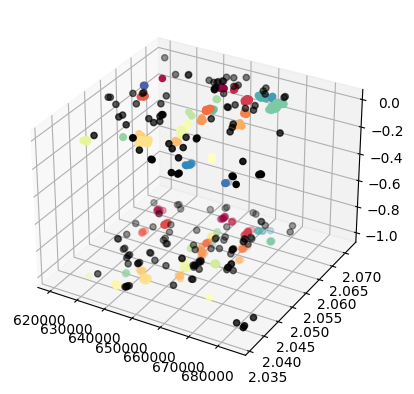

In [37]:
import matplotlib.dates as mdates

# ...

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign a different color to each cluster label
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Convert datetime.date to sequential numeric values
dates_numeric = mdates.date2num(data[:, 2])

# Plot the data points with cluster labels
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = [0, 0, 0, 1]  # Black color for outliers

    cluster_points = data[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], dates_numeric[labels == label], c=color, label=f'Cluster {label}')

# ...

plt.show()
